In [1]:
from typing import Literal, TypedDict

import matplotlib.pyplot as plt
import numpy as np
from astropy.timeseries import LombScargle
from constants import DATA_DIR

from astrofit.model import Asteroid, Lightcurve, LightcurveBin
from astrofit.model.enums import EnumSortOption
from astrofit.utils import (
    AsteroidLoader,
    LightcurveBinner,
    LightcurvePlotter,
    LightcurveSplitter,
)
from astrofit.utils.enums import BinningMethodEnum

In [2]:
asteroid_loader = AsteroidLoader(DATA_DIR)
lightcurve_binner = LightcurveBinner()
lightcurve_plotter = LightcurvePlotter()
lightcurve_splitter = LightcurveSplitter()

In [3]:
asteroids = sorted((
    asteroid_loader.load_asteroid(name) for name in asteroid_loader.available_asteroids
), key=lambda asteroid: asteroid.period)
asteroids

[Asteroid(id=29204, name=Ladegast, period=2.031527, lightcurves=1),
 Asteroid(id=52820, name=1998 RS2, period=2.134122, lightcurves=1),
 Asteroid(id=7779, name=Susanring, period=2.19003, lightcurves=1),
 Asteroid(id=138831, name=2000 UD68, period=2.28689, lightcurves=1),
 Asteroid(id=16118, name=Therberens, period=2.28855, lightcurves=1),
 Asteroid(id=13688, name=Oklahoma, period=2.38144, lightcurves=1),
 Asteroid(id=2102, name=Tantalus, period=2.39006, lightcurves=22),
 Asteroid(id=8600, name=Arundinaceus, period=2.40106, lightcurves=1),
 Asteroid(id=14664, name=Vandervelden, period=2.454632, lightcurves=2),
 Asteroid(id=8936, name=Gianni, period=2.46755, lightcurves=1),
 Asteroid(id=3476, name=Dongguan, period=2.5131, lightcurves=1),
 Asteroid(id=2962, name=Otto, period=2.536321, lightcurves=1),
 Asteroid(id=232888, name=2004 XG17, period=2.541845, lightcurves=1),
 Asteroid(id=19898, name=1177 T-3, period=2.557692, lightcurves=2),
 Asteroid(id=6053, name=1993 BW3, period=2.57386, lig

In [4]:
np.percentile([asteroid.period for asteroid in asteroids], [5, 25, 50, 75, 90, 95])

array([  3.422438,   5.48469 ,   8.78678 ,  16.97036 ,  49.0198  ,
       108.6936  ])

In [9]:
asteroid, = [asteroid for asteroid in asteroids if asteroid.name == "Eunomia"]
asteroid

Asteroid(id=15, name=Eunomia, period=6.082754, lightcurves=107)

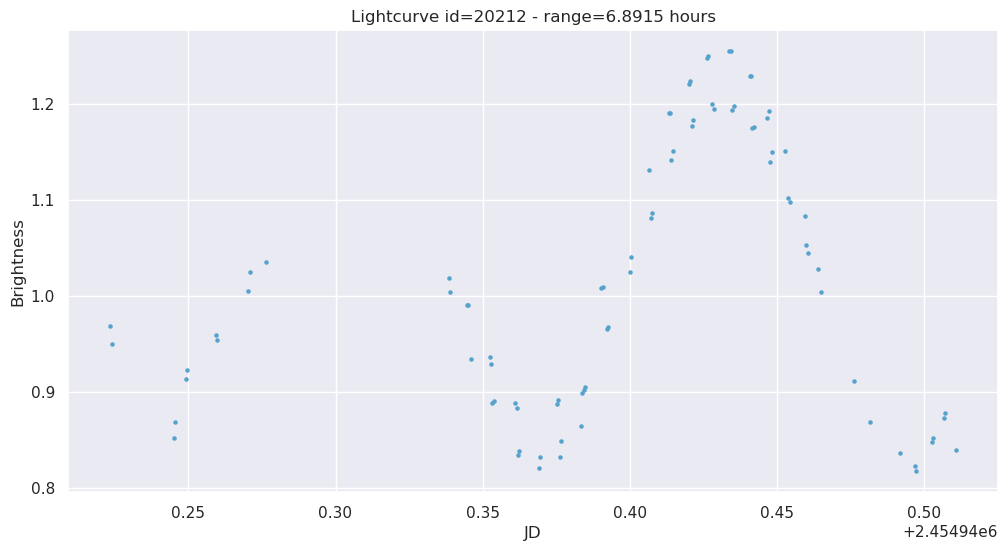

In [10]:
asteroid.get_longest_lightcurve(by=EnumSortOption.PERIOD).plot()

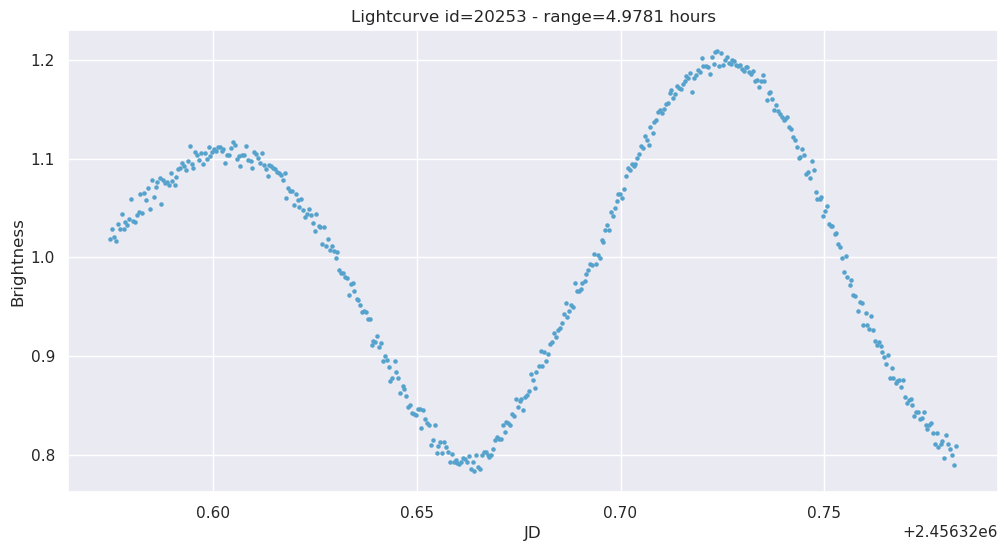

In [11]:
asteroid.get_longest_lightcurve(by=EnumSortOption.POINTS).plot()

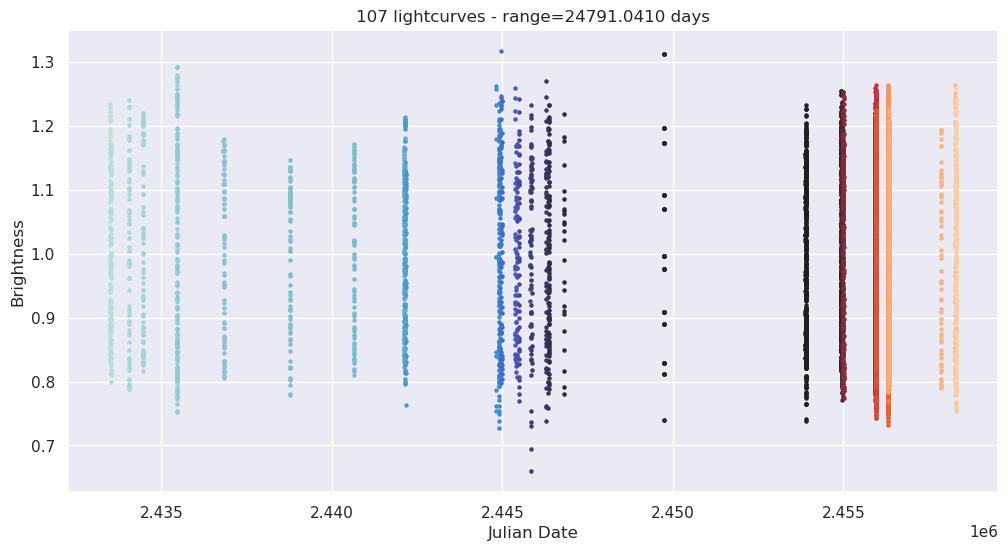

In [12]:
lightcurve_plotter.plot_lightcurves(asteroid.lightcurves, split_plots=False)

In [ ]:
splitted = lightcurve_splitter.split_lightcurves(
    asteroid.lightcurves,
    max_hours_diff=24,
    min_no_points=10,
)
splitted

In [ ]:
bins = lightcurve_binner.bin_lightcurves(
    splitted,
    max_time_diff=45,
    binning_method=BinningMethodEnum.LAST_TO_FIRST_DIFF,
)
bins = sorted(bins, key=lambda bin: bin.points_count, reverse=True)
bins

In [ ]:
_bin = bins[0]
lightcurve_plotter.plot_lightcurves(_bin, split_plots=False)

In [ ]:
lightcurve_plotter.plot_phased_lightcurves(_bin, period=asteroid.period)

In [ ]:
lightcurve_plotter.plot_phased_lightcurves(_bin, period=asteroid.period - 0.02)

In [ ]:
lightcurve_plotter.plot_phased_lightcurves(asteroid.lightcurves, period=asteroid.period)

In [ ]:
lightcurve_plotter.plot_lightcurves(_bin)

In [ ]:
asteroid.period

In [ ]:
freq, power = LombScargle(_bin.times, _bin.brightnesses, nterms=3).autopower(maximum_frequency=6)

idx = np.argsort(power)[::-1][:100]
top_k_freqs = freq[idx]

fig = plt.plot(freq, power)

plt.xlabel("Frequency")
plt.ylabel("Power")
plt.title(f"Lomb-Scargle periodogram for {asteroid.name}")
plt.show()

In [ ]:
asteroid.period

In [ ]:
top_4_bins = bins[:4]

lightcurve_plotter.plot_bins_on_grid((2, 2), top_4_bins)